In [15]:
heights = read.csv('height.csv')

In [16]:
str(heights)

'data.frame':	80 obs. of  1 variable:
 $ height: int  151 154 160 160 163 156 158 156 154 160 ...


In [17]:
summary(heights)

     height     
 Min.   :143.0  
 1st Qu.:154.0  
 Median :157.5  
 Mean   :157.6  
 3rd Qu.:161.2  
 Max.   :169.0  

In [18]:
head(heights)

,height
,<int>
1,151
2,154
3,160
4,160
5,163
6,156


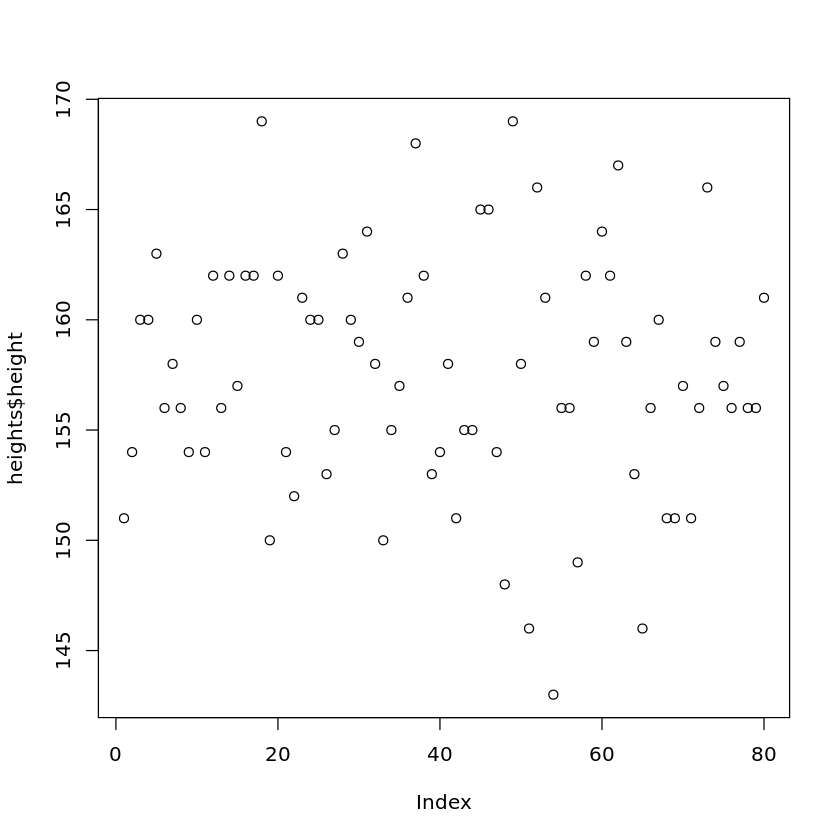

In [19]:
plot(heights$height)

## 도수분포표
* 단순한 숫자의 나열인 데이터 자체로는 어떠한 정보도 알 수 없음
* 80명의 학생의 키를 정리한 데이터에서 무엇을 알수 있을까?
* 각 학생들의 키는 모두 같지않고 제각각의 숫자로 나타남 
    + 다양한 수치로 나타나는 것을 **분포** 한다라고 함  
    
   <br>   
* 분포가 생기는 이유는 어떤 불확실성(!)이 있기 때문
* 이러한 불확실성이 제각각인 키의 수치를 발생시킨다고 여김
* 하지만, 이러한 수치들에도 고유한 특징이나 반복(패턴)되는 것이 존재
* 분포의 특성을 도출하기 위해 (확률에 근거한)통계라는 도구 사용
* 분포화된 자료를 시각화하려면 히스토그램을 그려야 함

## 히스토그램을 그리는 방법
* 도수분포표를 작성해야 함
    + 최대/최소값
    + 계급class 설정 - **구간**
    + **계급값** 설정
    + 계급내 데이터수 파악 - **빈도/도수** frequency
    + 각 계급 빈도의 상대비율 - **상대도수**
    + 각 계급의 누적합 - **누적도수**
* 히스토그램을 통해 데이터의 분포(어떻게 모여 있는지) 파악 가능

In [10]:
# 범위 파악 : xlim
height <- heights$height
mx <- max(height)
mn <- min(height)
range <- mx-mn

sprintf('%d %d %d', mx, mn, range)

# 169, 143
# 구간범위 : 140 ~ 170

[1] "169 143 26"

In [11]:
# 구간 breaks 설정
bmax = 0 #구간 최대값
bmin = as.integer(mn/10) * 10 #구간 최소값

sprintf('%d %d', bmin, bmax)

[1] "140 0"

In [27]:
# 계급값 설정 - 구간을 대표하는 기준값
bins = seq(140, 170, 5)
bins  # 140 145 150 155 160 165 170

mid = (bins[2] - bins[1]) / 2
mdbins = bins + mid
mdbins # 142.5147.5152.5157.5162.5167.5172.5

[1] 140 145 150 155 160 165 170

[1] 142.5 147.5 152.5 157.5 162.5 167.5 172.5

[1]  1  6 19 30 18  6

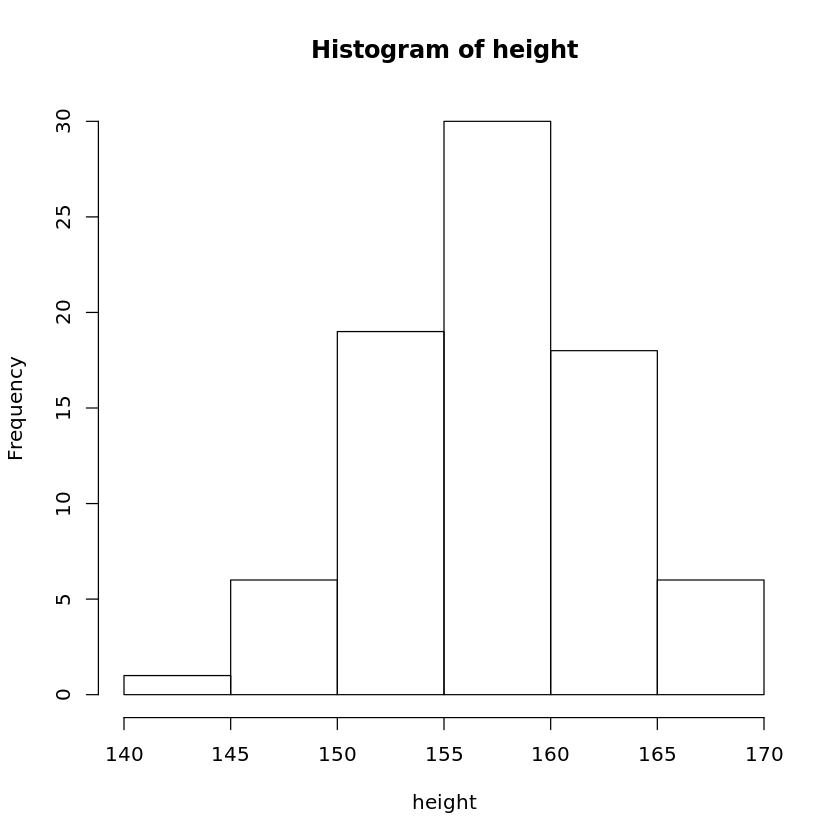

In [44]:
# 구간내 빈도계산
h <- hist(height, breaks=bins)
h$counts

In [36]:
# 상대도수 : 구간별빈도/전체빈도수
total = length(height)    # 전체빈도수 = 전체수 = 80
relfrq = h$counts / total
relfrq


sum(relfrq)   # 상대도수의 총합은 1

[1] 0.0125 0.0750 0.2375 0.3750 0.2250 0.0750

[1] 1

In [48]:
# 누적대도수 : 각 구간별 빈도 누적합
# 누적합 : cumsum(객체)
csfrq = cumsum(h$counts)
csfrq 

[1]  1  7 26 56 74 80

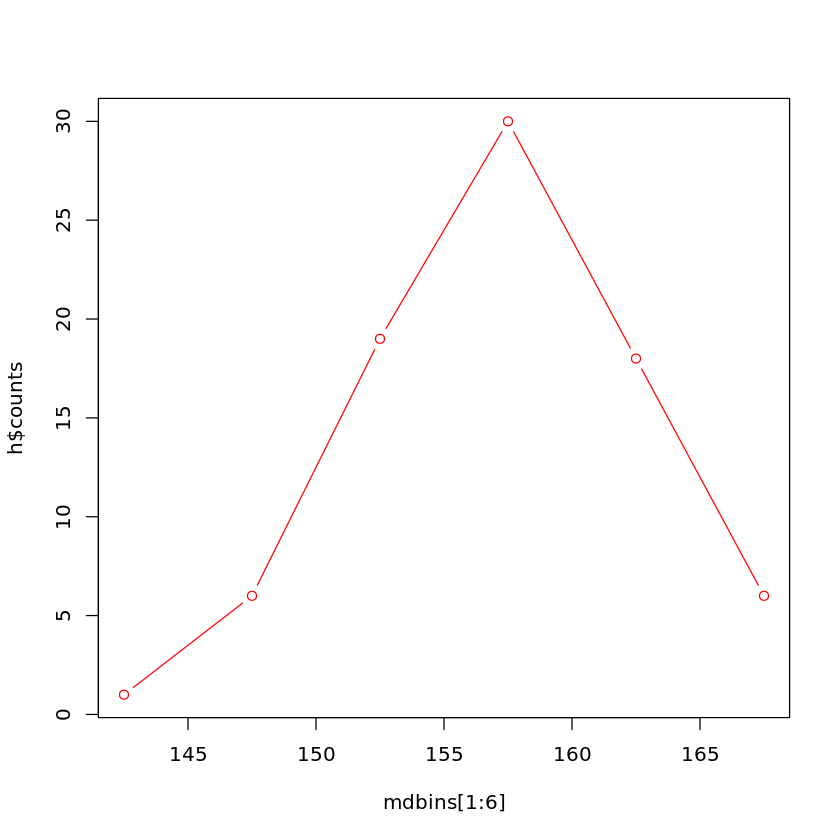

In [38]:
# 계급값 시각화
plot(mdbins[1:6], h$counts, type='b', col='red')

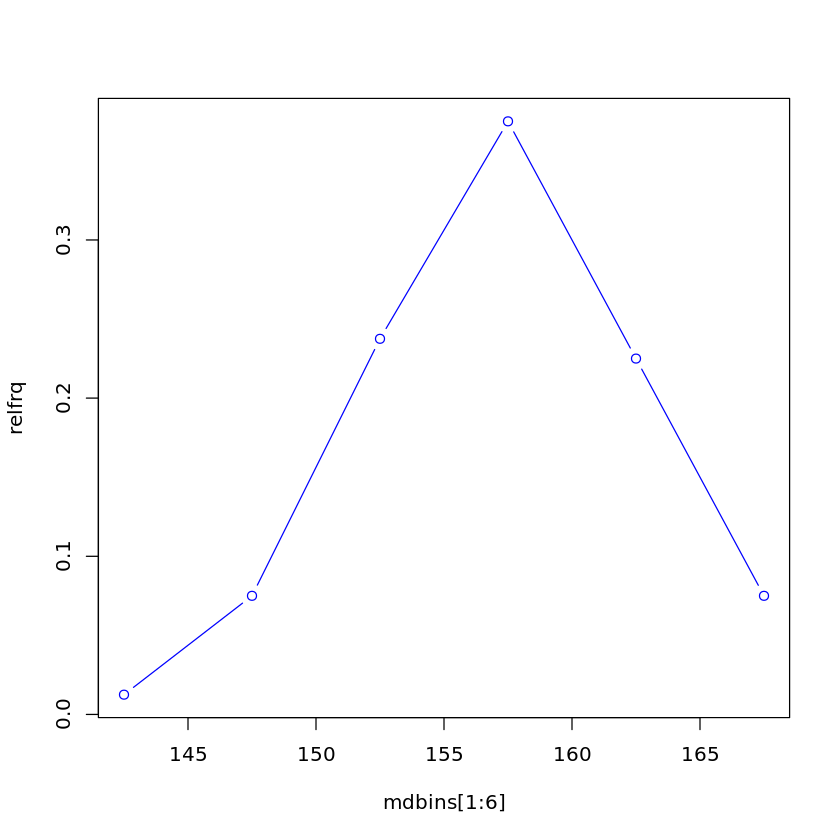

In [31]:
# 상대도수 시각화
plot(mdbins[1:6], relfrq, type='b', col='blue')

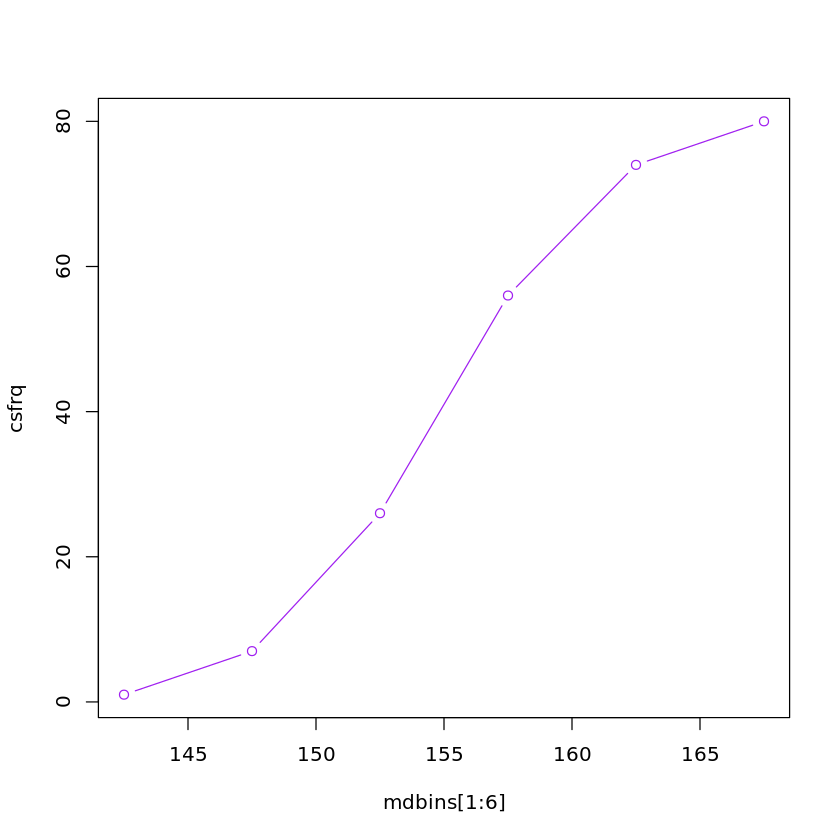

In [49]:
# 누적도수 시각화
plot(mdbins[1:6], csfrq, type='b', col='purple')

## 확률밀도 추정KDE 그래프
+ kernal density estimation
+ 관측된 데이터들의 분포로부터 원래 변수의 확률분포특성을 추정
+ 즉, 해당 변수에서 관측된 몇가지 데이터로부터 변수가 가질수 있는 모든 값들에 대한 밀도(확률)를 추정하는 것을 의미
  - 예) 수능을 위해 모의고사를 실시하는 경우
  - 모의고사를 통해 실제 수능시험 성적 예측 가능
  - 즉, 몇 회의 모의고사 성적에 대한 분포를 토대로 
  - 실제 수능시험울 통해 받을 성적에 대한 확률을 유추해 볼수 있음

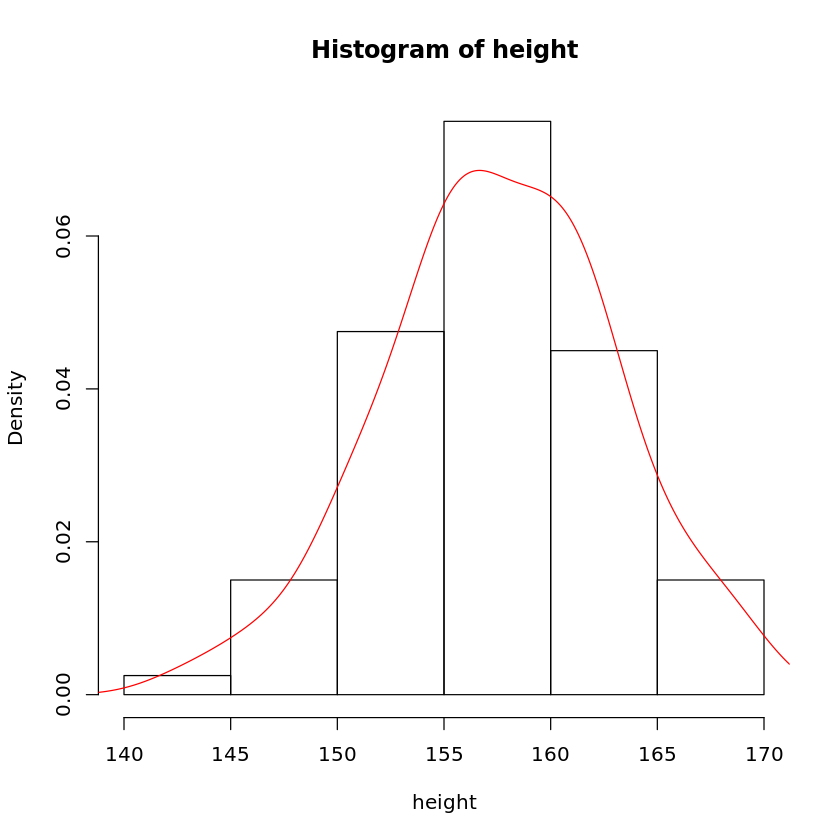

In [47]:
# 확률밀도추정KDE 그래프 시각화


hist(height, freq=F)
lines(density(height), col='red')

In [53]:
# 조선조 왕들 수명의 분포 확인

kings <- c(73, 62, 45, 53, 38, 16, 51, 28, 37, 30, 56, 30, 33, 56, 66, 54, 40, 33, 59, 36, 82, 48, 44, 22, 32, 67, 52)

summary(kings)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   33.00   45.00   46.04   56.00   82.00 

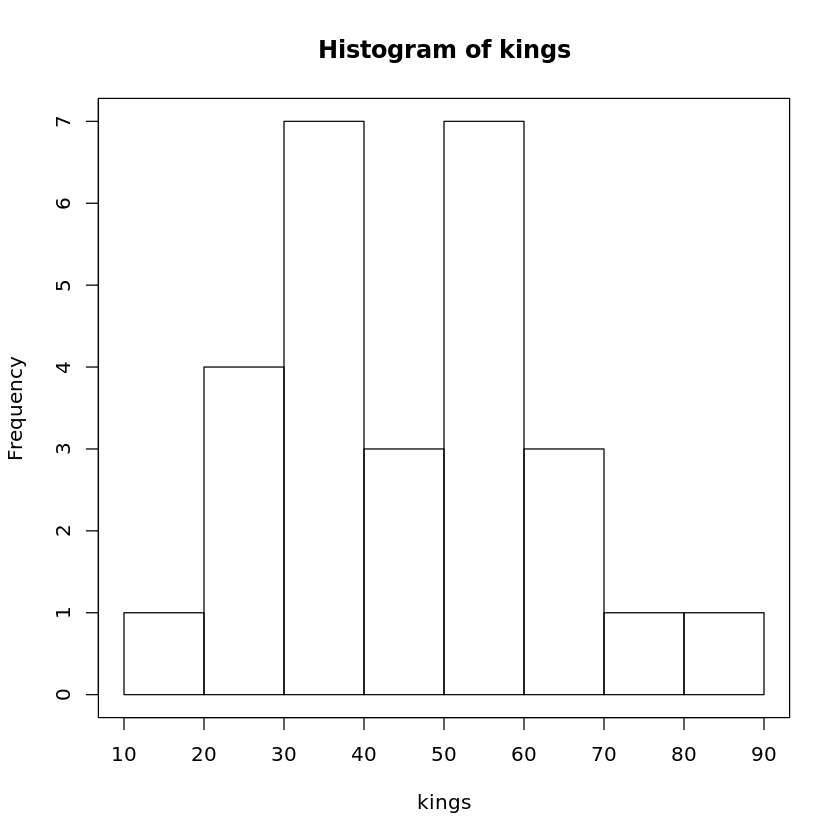

In [60]:
hist(kings, axes=F)

axis(side=1, at=seq(10,90,10))
axis(side=2, at=seq(0,10))
box()

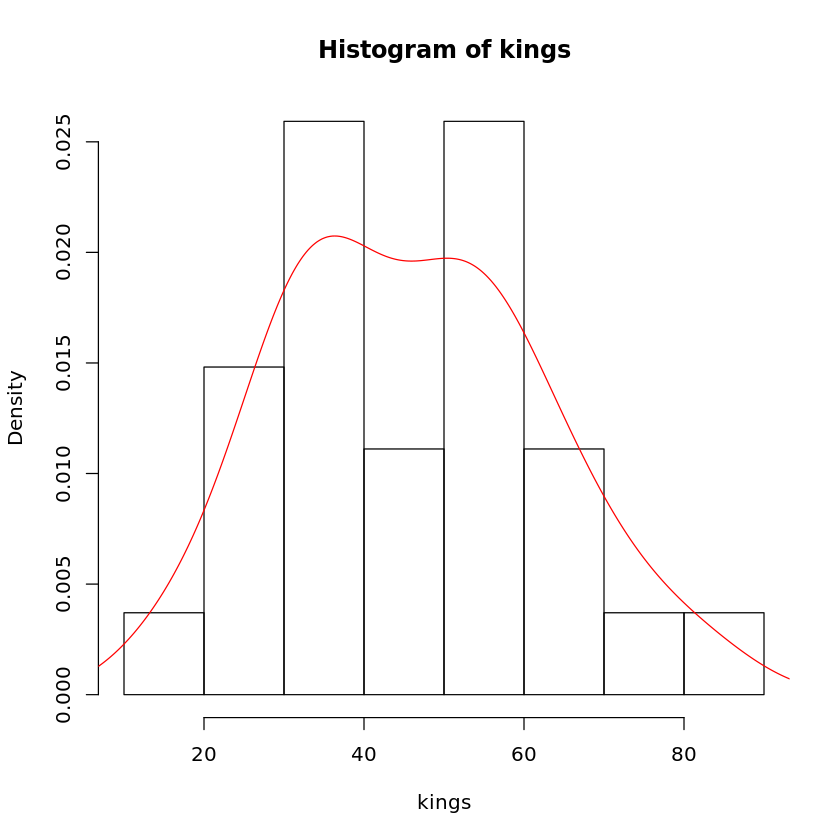

In [63]:
# KDE

# hist(kings, freq=F)
hist(kings, probability = T)
lines(density(kings), col='red')

In [51]:
# 청소년 핸드폰 사용시간에 대한 히스토그램과
# 확률분포추정 그래프를 작성하세요

phone <- c(10, 37, 22, 32, 18, 15, 15, 18, 22, 15, 20, 25, 38, 28, 25, 30, 20, 22, 18, 22, 22, 12, 22, 26, 22, 32, 22, 23, 20, 
           23, 23, 20, 25, 51, 20, 25, 26, 22, 26, 28, 28, 20, 23, 30, 12, 22, 35, 11, 20, 25)

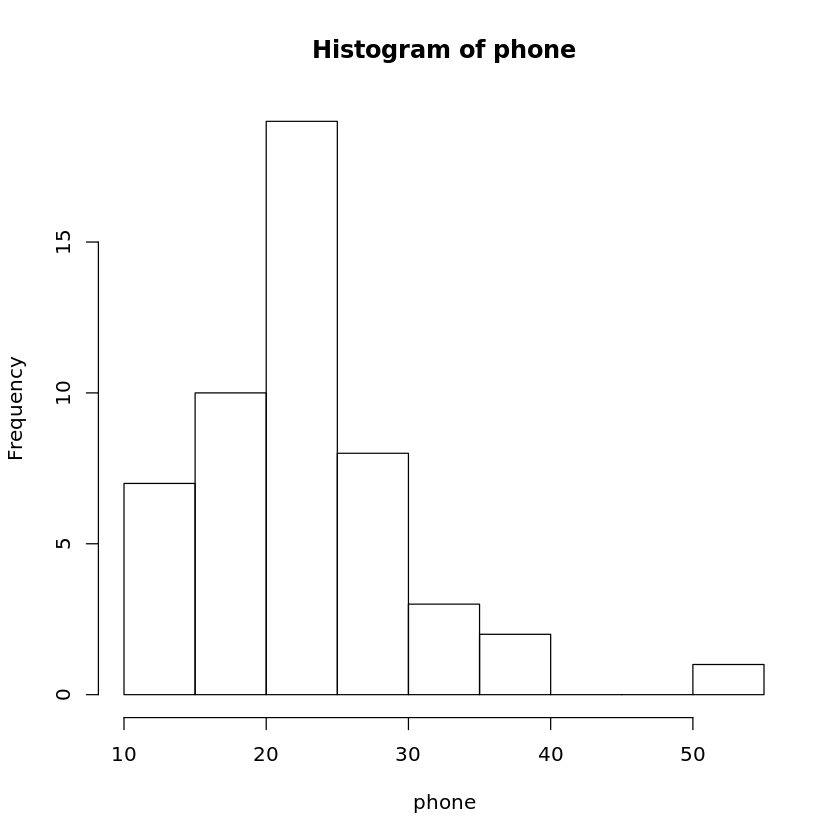

In [64]:
hist(phone)

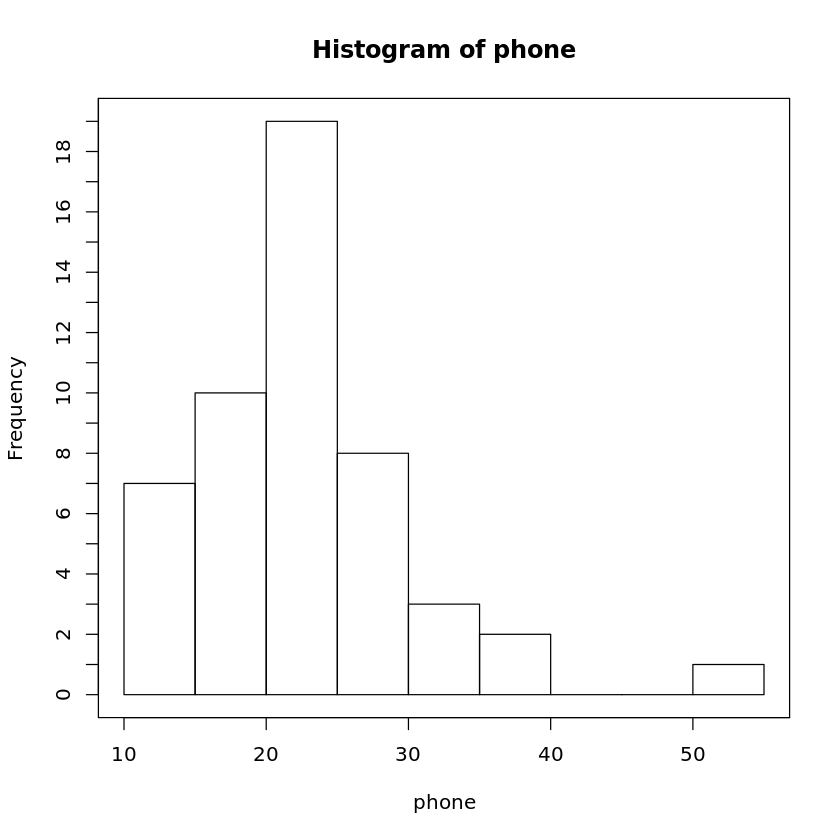

In [66]:
hist(phone, axes=F)

axis(side=1, at=seq(10,60,10))
axis(side=2, at=seq(0,20))
box()

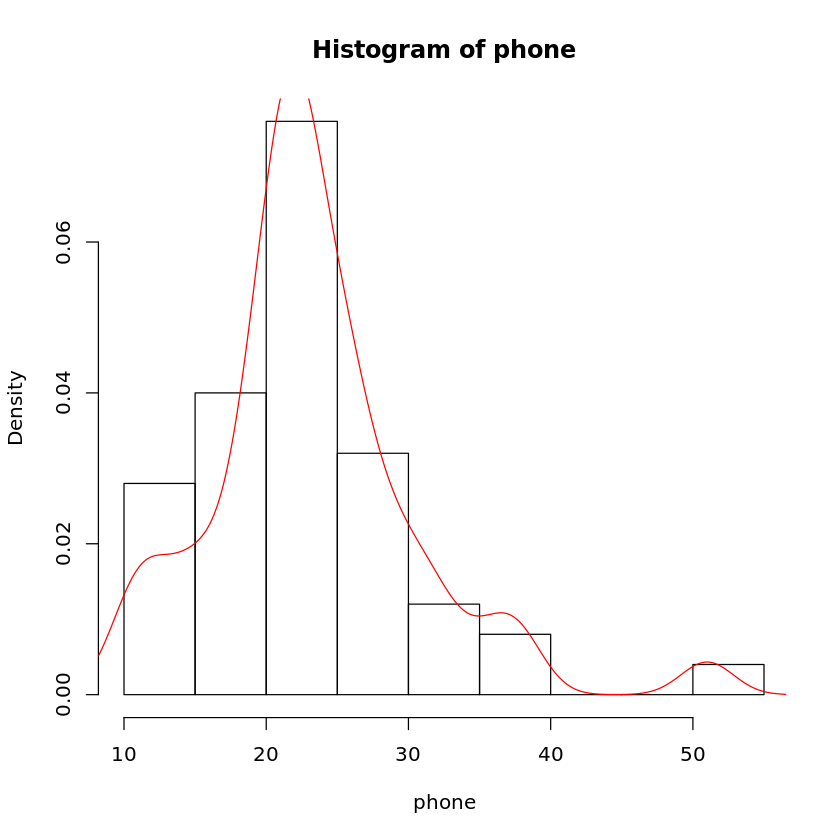

In [67]:
hist(phone, probability = T)
lines(density(phone), col='red')

## 히스토그램 더 잘 다루기
+ hist(대상, 구간정보, 옵션)

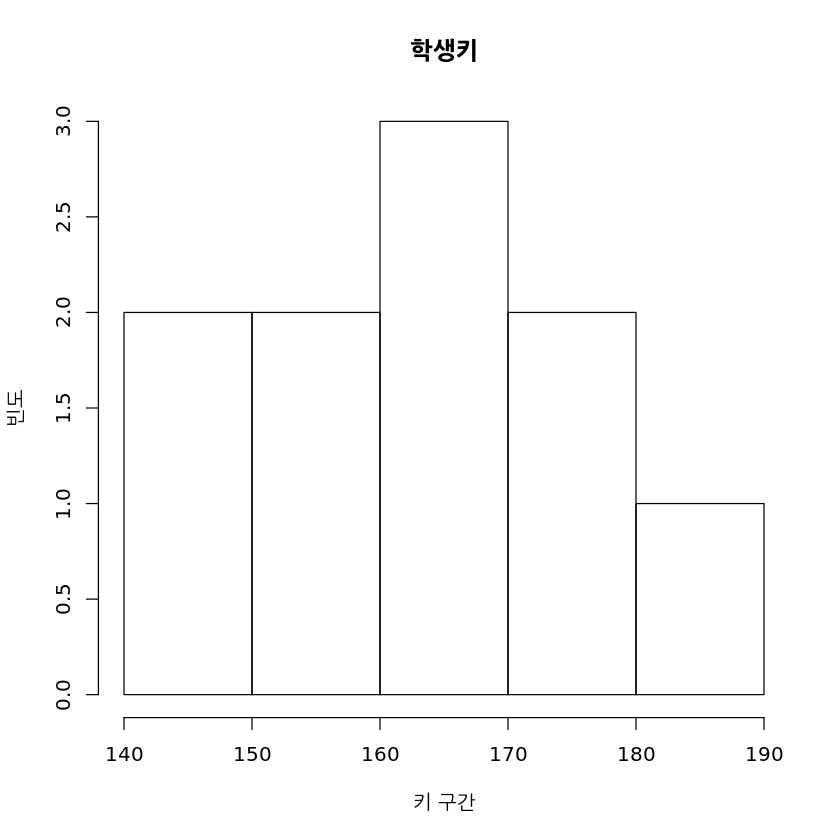

In [72]:
## 학생 10명의 키 데이터
heights <- c(170,165,182,156,142,165,159,147,175,172)


hist(heights, main='학생키', xlab='키 구간', ylab='빈도')

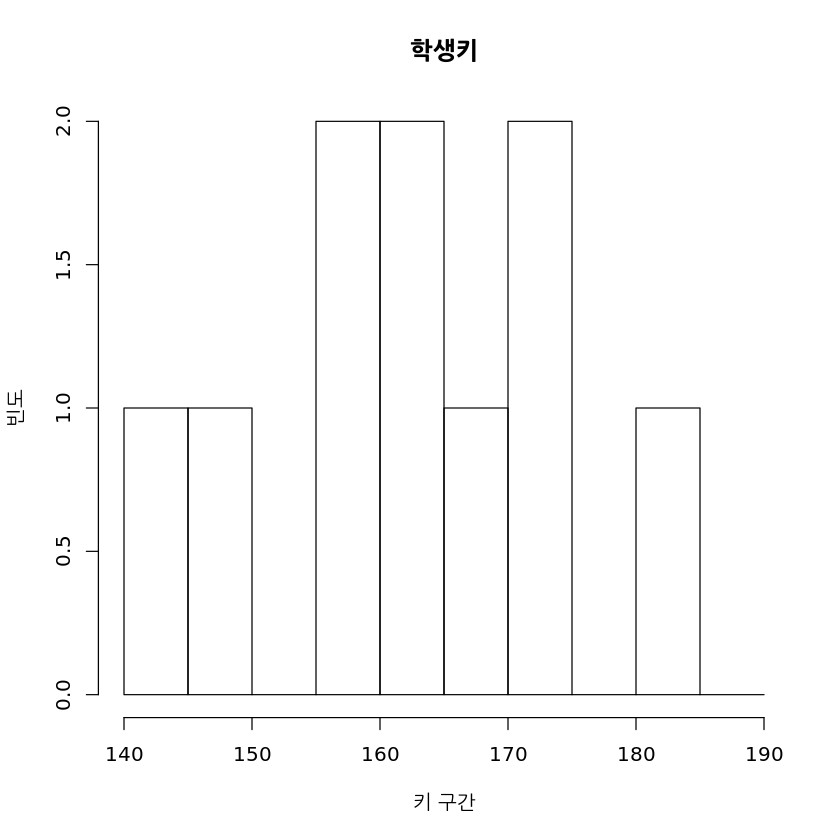

In [73]:
# 세부적인 구간정보는 breaks로 설정

hist(heights, breaks=seq(140,190,5), main='학생키', xlab='키 구간', ylab='빈도')

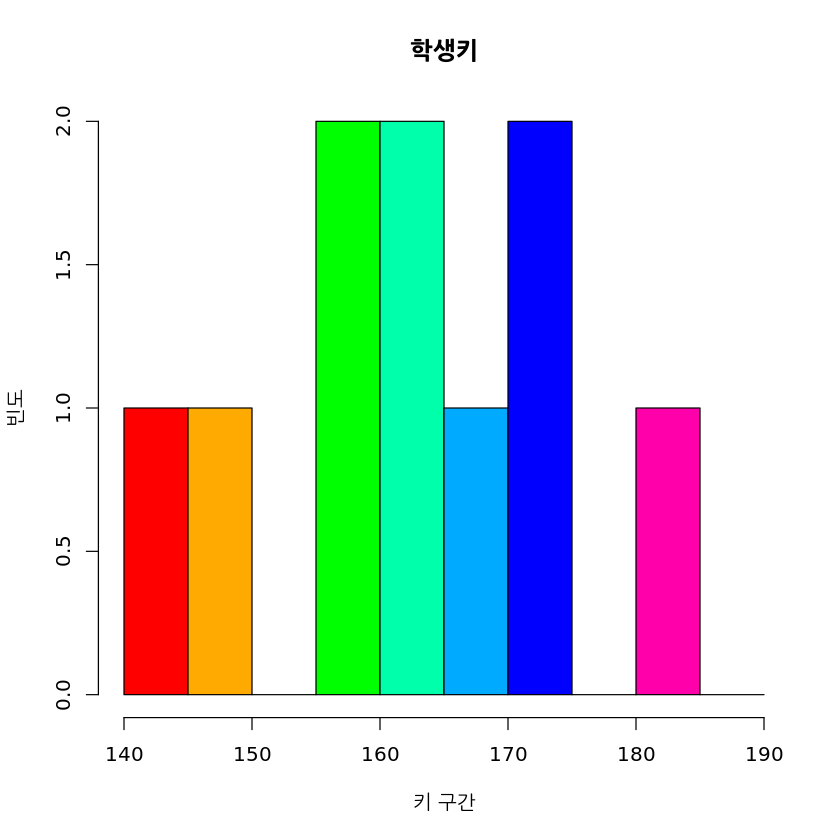

In [85]:
# 색상지정 - colormap
# 구글에서 'matplotlib colormap'를 검색
# R에서 제공하는 colormap : rainbow, heat.colors
# cm.colors, topo.colors, terrain.colors

hist(heights, breaks=seq(140,190,5), main='학생키', xlab='키 구간', ylab='빈도', col=rainbow(9))

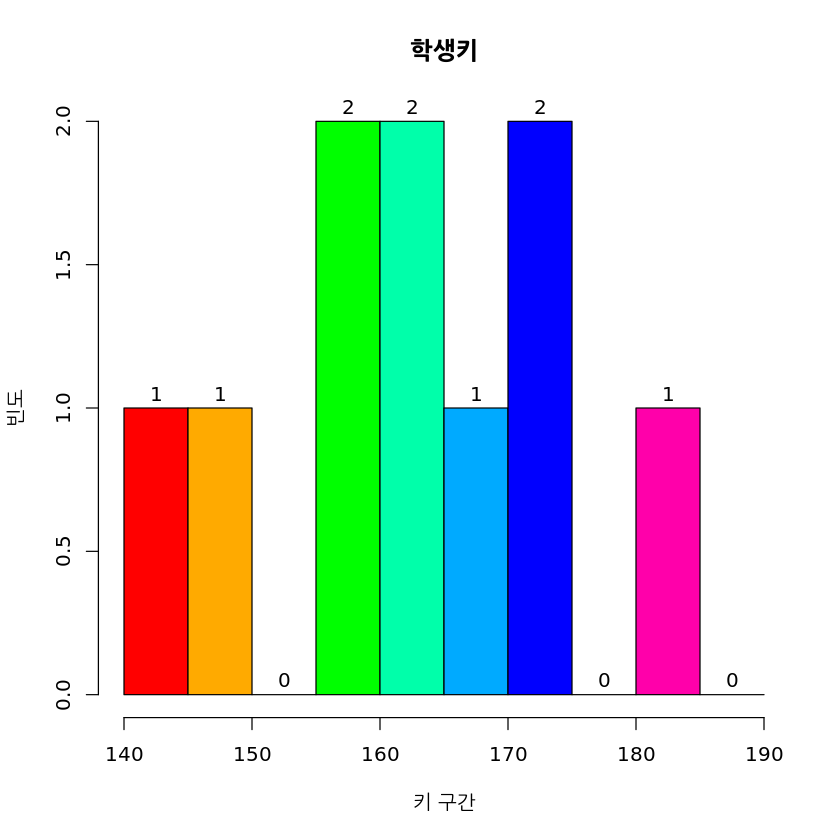

In [110]:
# 히스토그램에 빈도수 나타내기

h <- hist(heights, breaks=seq(140,190,5), main='학생키', xlab='키 구간', ylab='빈도', col=rainbow(9))

# h

text(h$mids, h$counts+0.05,  lab=h$counts)

In [122]:
# 타이타닉 탑승객의 나이 분포 시각화

titanic = read.csv('titanic.csv')

In [121]:
titanic$pclass <- as.factor(titanic$pclass)
titanic$survived <- as.factor(titanic$survived)
titanic$name <- as.factor(titanic$name)
titanic$ticket <- as.factor(titanic$ticket)

In [123]:
str(titanic)

'data.frame':	1306 obs. of  13 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : Factor w/ 1304 levels "Abbing, Mr. Anthony",..: 22 24 25 26 27 31 46 47 51 55 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 927 levels "110152","110413",..: 187 49 49 49 49 124 92 16 76 824 ...
 $ fare    : num  211 152 152 152 152 ...
 $ embarked: Factor w/ 3 levels "C","Q","S": 3 3 3 3 3 3 3 3 3 1 ...
 $ life    : Factor w/ 2 levels "dead","live": 2 2 1 1 1 2 2 1 2 1 ...
 $ seat    : Factor w/ 3 levels "1st","2nd","3rd": 1 1 1 1 1 1 1 1 1 1 ...
 $ port    : Factor w/ 1 level "cherbourg": 1 1 1 1 1 1 1 1 1 1 ...


In [125]:
summary(titanic)

     pclass         survived                                    name     
 Min.   :1.000   Min.   :0.0000   Connolly, Miss. Kate            :   2  
 1st Qu.:2.000   1st Qu.:0.0000   Kelly, Mr. James                :   2  
 Median :3.000   Median :0.0000   Abbing, Mr. Anthony             :   1  
 Mean   :2.296   Mean   :0.3813   Abbott, Master. Eugene Joseph   :   1  
 3rd Qu.:3.000   3rd Qu.:1.0000   Abbott, Mr. Rossmore Edward     :   1  
 Max.   :3.000   Max.   :1.0000   Abbott, Mrs. Stanton (Rosa Hunt):   1  
                                  (Other)                         :1298  
     sex           age              sibsp         parch             ticket    
 female:464   Min.   : 0.1667   Min.   :0.0   Min.   :0.0000   CA. 2343:  11  
 male  :842   1st Qu.:22.0000   1st Qu.:0.0   1st Qu.:0.0000   1601    :   8  
              Median :29.8811   Median :0.0   Median :0.0000   CA 2144 :   8  
              Mean   :29.8269   Mean   :0.5   Mean   :0.3859   3101295 :   7  
             

In [120]:
head(titanic)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,life,seat,port
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,live,1st,cherbourg
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,live,1st,cherbourg
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,dead,1st,cherbourg
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,dead,1st,cherbourg
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,dead,1st,cherbourg
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,live,1st,cherbourg


In [136]:
# 히스토그램 구간 수
cuts = length(seq(0, 80, 5))
cuts

[1] 17

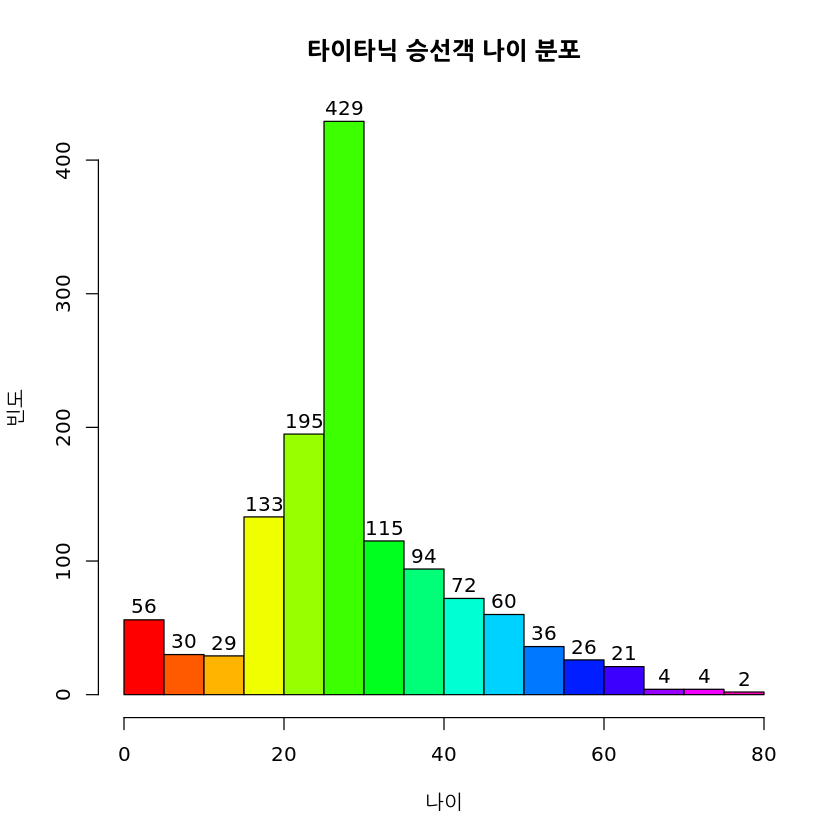

In [141]:
h <- hist(titanic$age, main = '타이타닉 승선객 나이 분포', xlab='나이', ylab='빈도', col=rainbow(17))

text(h$mids, h$counts+10, lab=h$counts)

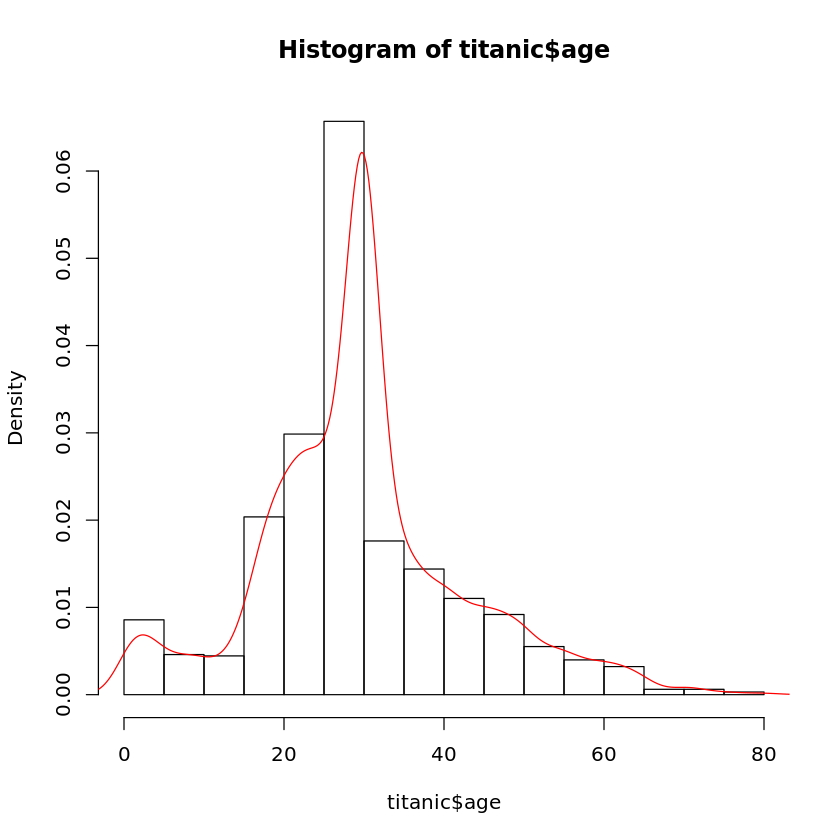

In [148]:
hist(titanic$age, probability=T)
lines(density(titanic$age), col='red')

In [157]:
# ggplot 패키지 설치
# jupyter의 터미널 탭을 이용해서 설치할것!
#install.packages('ggplot2')

library(ggplot2)

## tips 데이터셋
+ seaborn 내장 데이터셋
+ 손님들의 성별, 흡연여부, 요일별, 시간별, 손님수별 식사비용과 팁에 관련된 데이터

In [1]:
tips <- read.csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [2]:
# 식사규모size를 범주형으로 변환

tips$size <- as.factor(tips$size)


str(tips)

summary(tips)

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 2 2 2 2 ...
 $ smoker    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : Factor w/ 4 levels "Fri","Sat","Sun",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ time      : Factor w/ 2 levels "Dinner","Lunch": 1 1 1 1 1 1 1 1 1 1 ...
 $ size      : Factor w/ 6 levels "1","2","3","4",..: 2 3 3 2 4 4 2 4 2 2 ...


   total_bill         tip             sex      smoker      day         time    
 Min.   : 3.07   Min.   : 1.000   Female: 87   No :151   Fri :19   Dinner:176  
 1st Qu.:13.35   1st Qu.: 2.000   Male  :157   Yes: 93   Sat :87   Lunch : 68  
 Median :17.80   Median : 2.900                          Sun :76               
 Mean   :19.79   Mean   : 2.998                          Thur:62               
 3rd Qu.:24.13   3rd Qu.: 3.562                                                
 Max.   :50.81   Max.   :10.000                                                
 size   
 1:  4  
 2:156  
 3: 38  
 4: 37  
 5:  5  
 6:  4  

In [3]:
tips

total_bill,tip,sex,smoker,day,time,size
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2.00,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2


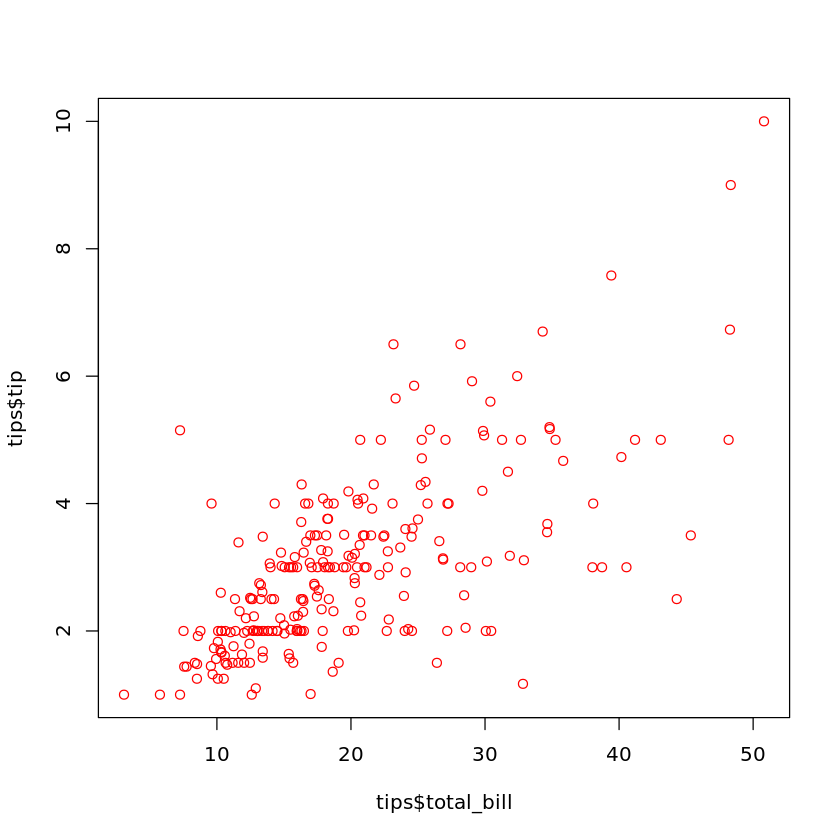

In [4]:
# 지불금액 대비 팁과의 관계 : 산점도

plot(tips$total_bill, tips$tip, col='red')

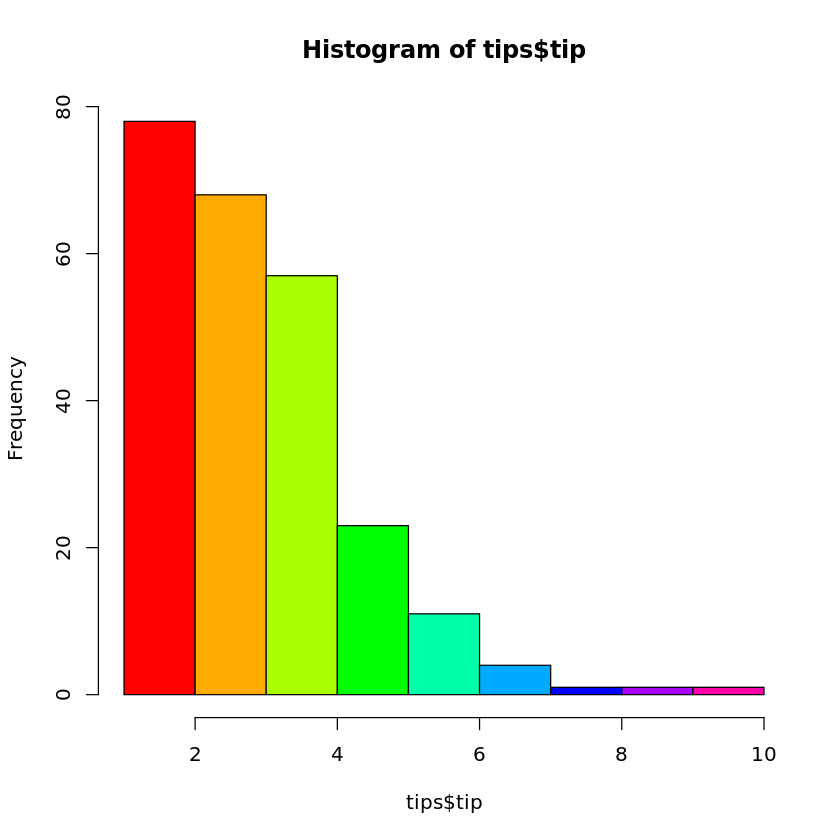

In [5]:
# 팁별 빈도 : 히스토그램

hist(tips$tip, col=rainbow(9))


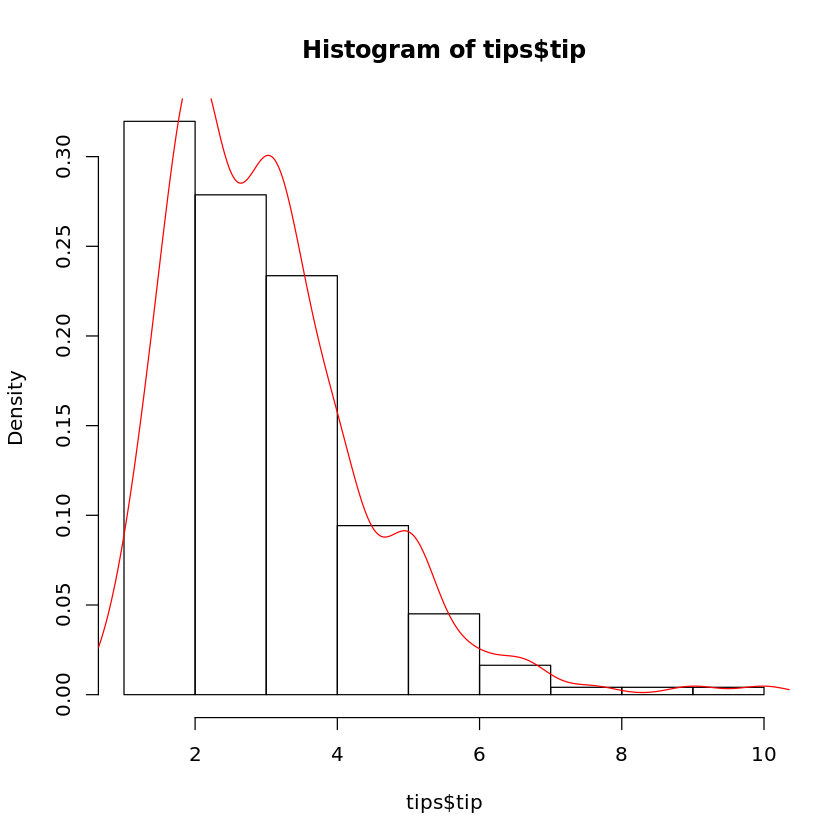

In [6]:
# 팁별 빈도 : KDE

hist(tips$tip, probability=T)

lines(density(tips$tip), col='red')


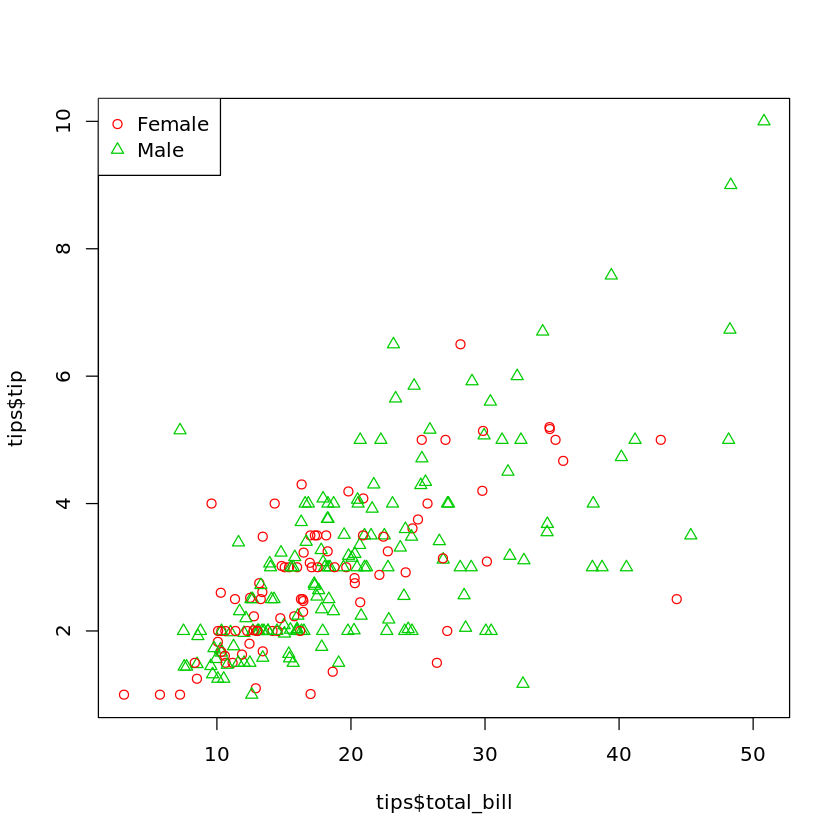

In [7]:
# 지불금액 대비 팁과의 관계 + 성별 : 산점도

gender <- as.integer(tips$sex)


plot(tips$total_bill, tips$tip,

     pch=gender, col=gender+1)


legend('topleft', levels(tips$sex),

     pch=unique(gender), col=unique(gender+1))

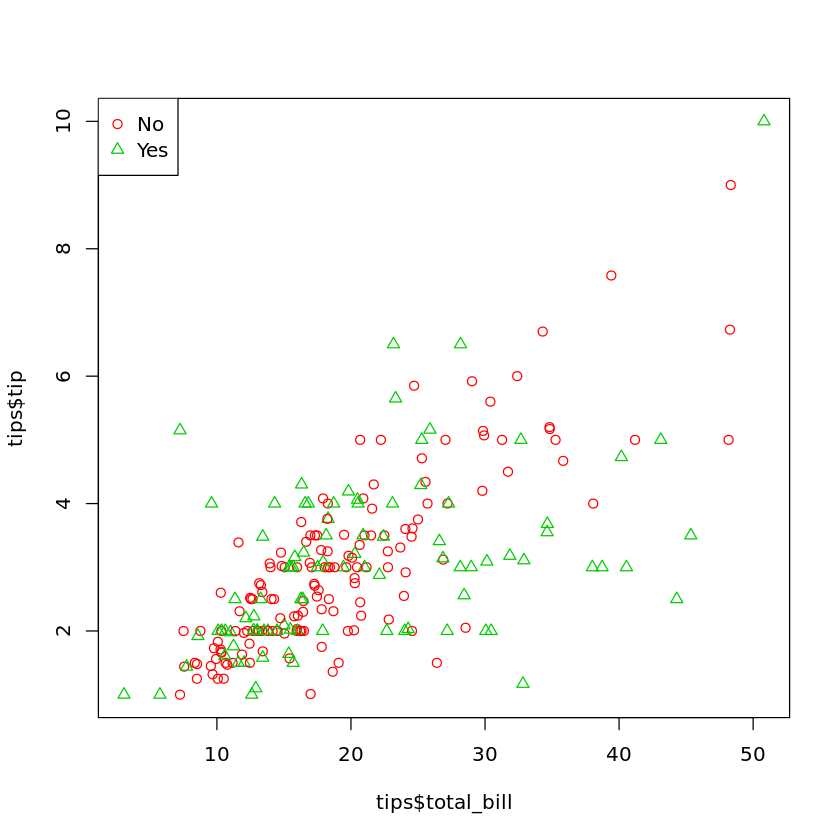

In [9]:
# 지불금액 대비 팁과의 관계 + 흡연여부 : 산점도

smoker <- as.integer(tips$smoker)


plot(tips$total_bill, tips$tip,

     pch=smoker, col=smoker+1)


legend('topleft', levels(tips$smoker),

     pch=unique(smoker), col=unique(smoker+1))

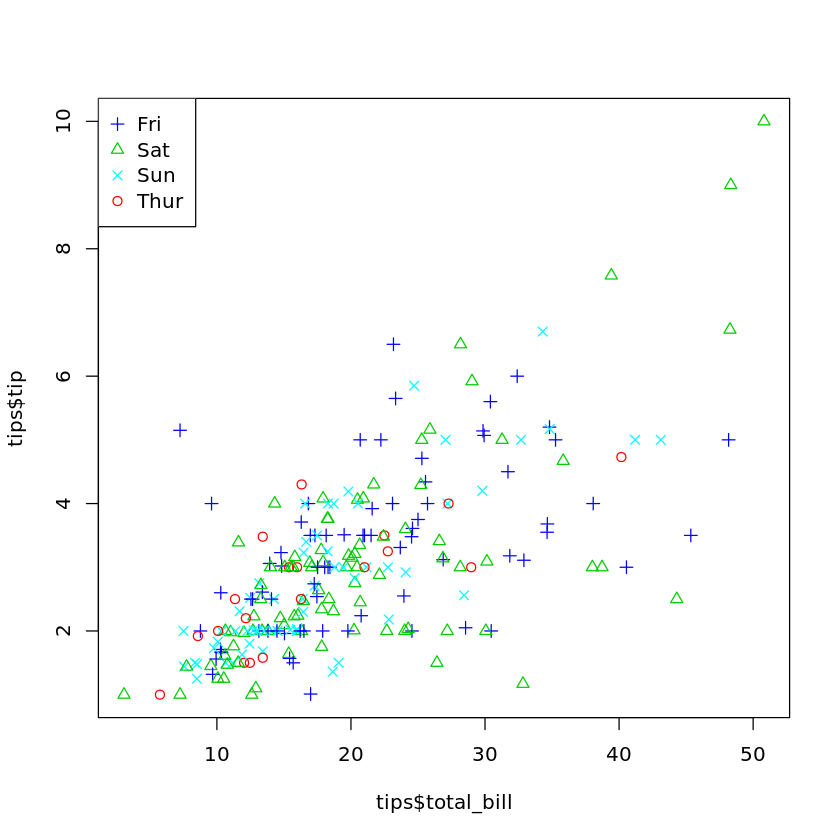

In [10]:
# 지불금액 대비 팁과의 관계 + 요일 : 산점도

day <- as.integer(tips$day)


plot(tips$total_bill, tips$tip,

     pch=day, col=day+1)


legend('topleft', levels(tips$day),

     pch=unique(day), col=unique(day+1))

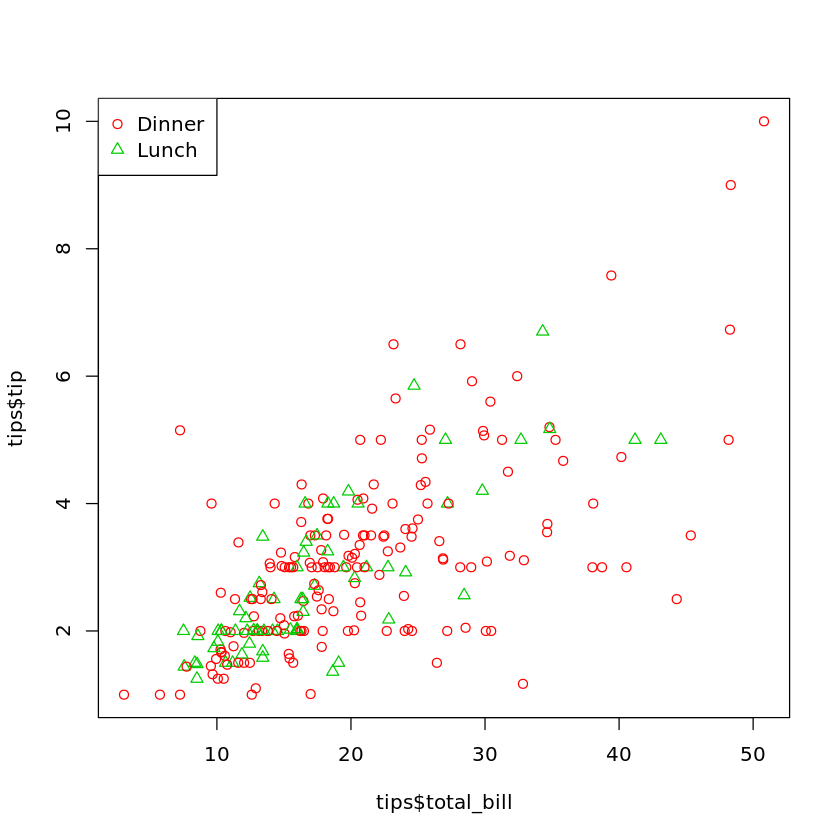

In [11]:
# 지불금액 대비 팁과의 관계 + 시간 : 산점도

time <- as.integer(tips$time)


plot(tips$total_bill, tips$tip,

     pch=time, col=time+1)


legend('topleft', levels(tips$time),

     pch=unique(time), col=unique(time+1))


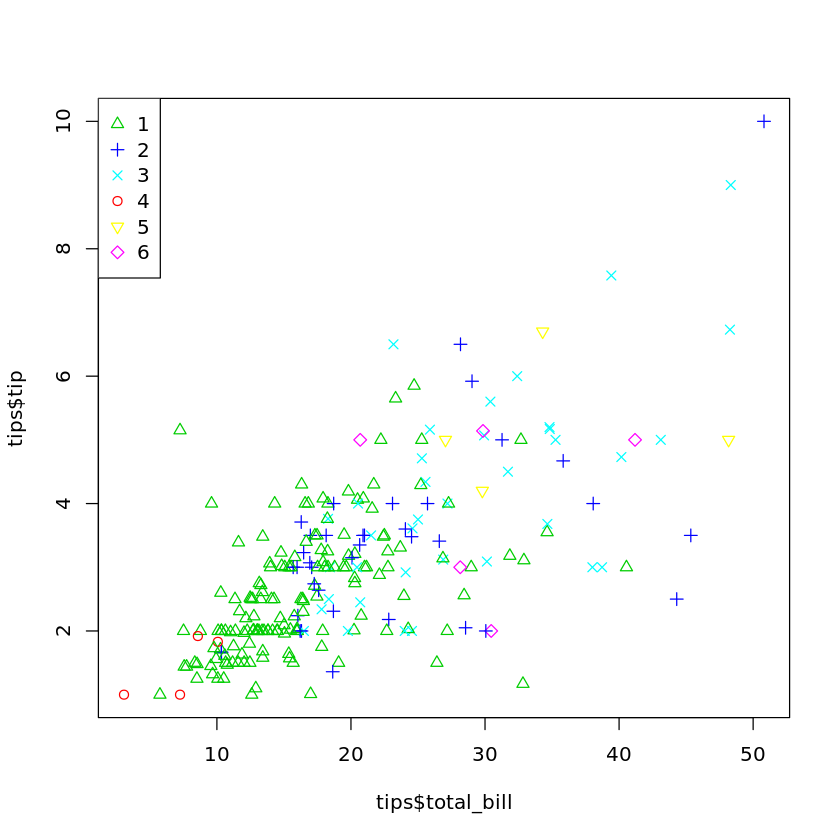

In [13]:
# 지불금액 대비 팁과의 관계 + 규모 : 산점도

size <- as.integer(tips$size)


plot(tips$total_bill, tips$tip,

     pch=size, col=size+1)

legend('topleft', levels(tips$size),

     pch=unique(size), col=unique(size+1))


## 작업한 데이터 저장하기

+ R에서 만든 객체(벡터, 데이터프레임)들은 메모리내에 생성

+ 따라서, 프로그램(주피터)이 종료하면 메모리내 객체들은 사라짐

+ 메모리내에 생성된 객체를 파일로 저장해둬야 함 - 직렬화

+ 파일저장 : save(객체명, 저장경로)

+ 파일읽기 : load(파일경로)

In [22]:
# 메모리내에 생성된 객체 확인 : ls

ls()     # heights 확인

[1] "day"     "gender"  "heights" "size"    "smoker"  "time"    "tips"

In [21]:
# 학생10명의 키 데이터를 heights.rdata로 저장

save(heights, file='heights.rdata')

In [24]:
load('heights.rdata')

ls()

[1] "day"     "gender"  "heights" "size"    "smoker"  "time"    "tips"